# Exercise notebook 4: Grouping your data

This Jupyter notebook, for Week 4 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course, contains code examples and coding activities for you.

In Week 4, you'll come across steps directing you to this notebook. Once you've done the exercise, go back to FutureLearn to discuss it with your fellow learners and course facilitators and mark it as complete. Remember to run the code in this notebook before you start.

## Exercise 1: Getting Comtrade data into your notebook

In this exercise, you will practice loading data from Comtrade into a pandas dataframe and getting it into a form where you can start to work with it. 

The following steps and code are an example. Your task for this exercise is stated at the end, after the example.

Generate a URL that makes a request to the Comtrade API for data about **monthly** *imports* and *exports* for all of 2014 for the dairy products *Milk and cream, neither concentrated nor sweetened (code 0401)* and *Milk and cream, either concentrated or sweetened (code 0402)*. The reporter is the **United Kingdom**, and the partners are **All**. Edit the URL so that it returns up to 5000 records (set `max=5000`) in the CSV format (`&fmt=csv`).


In [1]:
%matplotlib inline
from pandas import *
URL='http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=2014&r=826&p=all&rg=1%2C2&cc=0401%2C0402&fmt=csv'

Load the data in from the URL, ensuring that the various codes are read as strings. Preview the first few rows of the dataset.

In [2]:
milk=read_csv(URL,dtype={'Commodity Code':str, 'Reporter Code':str})
milk.head(3)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2014,201401,January 2014,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,22404316,NaN,21950747,NaN,NaN,0
1,HS,2014,201401,January 2014,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,60497363,NaN,46923551,NaN,NaN,0
2,HS,2014,201402,February 2014,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,18951778,NaN,18685555,NaN,NaN,0


Limit the columns to make the dataframe easier to work with by selecting just a subset of them.

In [19]:
COLUMNS=['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
milk=milk[COLUMNS]


Derive two new dataframes that separate out the 'World' partner data and the data for individual partner countries.

In [4]:
milk_world=milk[milk['Partner'] == 'World']
milk_countries=milk[milk['Partner'] != 'World']

You may wish to store a local copy as a CSV file, for example:

In [5]:
milk_countries.to_csv('countrymilk.csv', index=False)

To load the data back in:

In [6]:
load_test=read_csv('countrymilk.csv',dtype={'Commodity Code':str, 'Reporter Code':str})
load_test.head(2)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201407,Exports,United Kingdom,Afghanistan,"Milk and cream, neither concentrated nor sweet...",0401,4017
1,2014,201406,Exports,United Kingdom,Afghanistan,"Milk and cream, neither concentrated nor sweet...",0401,13150


If you are on a Windows computer, data files may sometimes be saved using a file encoding (*Latin-1*) that pandas does not recognise by default, causing you to see a `UnicodeDecodeError`.

In such cases, opening files in `read_excel()` or `read_csv()` using the parameter  `encoding="ISO-8859-1"` or  `encoding = "Latin-1"` should fix the problem. For example, edit the previous command to read:

`load_test=read_csv('countrymilk.csv', dtype={'Commodity Code':str}, encoding = "ISO-8859-1")`

### Subsetting Your Data
For large or heterogenous datasets, it is often convenient to create subsets of the data. To further separate out the imports:


In [7]:
milk_imports=milk_countries[milk_countries['Trade Flow']=='Imports']
milk_countries_imports=milk_countries[milk_countries['Trade Flow']=='Imports']
milk_world_imports=milk_world[milk_world['Trade Flow']=='Imports']

### Sorting the data

Having loaded in the data, find the most valuable partners in terms of import trade flow during a particular month by sorting the data by *decreasing* trade value and then selecting the top few rows.

In [8]:
milkImportsInJanuary2014=milk_countries_imports[milk_countries_imports['Period']==201401]
milkImportsInJanuary2014.sort('Trade Value (US$)',ascending=False).head(10)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
700,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, neither concentrated nor sweet...",0401,10676138
461,2014,201401,Imports,United Kingdom,France,"Milk and cream, concentrated or sweetened",0402,8020014
688,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,5966962
990,2014,201401,Imports,United Kingdom,Netherlands,"Milk and cream, concentrated or sweetened",0402,4650774
511,2014,201401,Imports,United Kingdom,Germany,"Milk and cream, concentrated or sweetened",0402,4545873
137,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,4472349
155,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, concentrated or sweetened",0402,3584038
356,2014,201401,Imports,United Kingdom,Denmark,"Milk and cream, neither concentrated nor sweet...",0401,2233438
1318,2014,201401,Imports,United Kingdom,Spain,"Milk and cream, concentrated or sweetened",0402,1850097
449,2014,201401,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1522872


### Task

To complete these tasks you could copy this notebook and amend the code or create a new notebook to do the analysis for your chosen data.

Using the [Comtrade Data website](http://comtrade.un.org/data/), identify a dataset that describes the import and export trade flows for a particular service or form of goods between your country (as reporter) and all ('All') the other countries in the world. Get the monthly data for all months in 2014.

Using the Comtrade API ('View API' link), pull this data into a pandas dataframe and create an easier to work with dataframe that excludes data associated with the 'World' partner. Sort this data to see which countries are the biggest partners in terms of import and export trade flow.

In [25]:
%matplotlib inline

from pandas import *
palmOilURL = "http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=2014&r=826&p=all&rg=all&cc=1511&fmt=csv"

# we need to coerce some numbers so they're not reformatted by Pandas
dataConversion = {'Commodity Code':str, 'Reporter Code':str}

palmOil = read_csv(palmOilURL, dtype=dataConversion)

# just a peek
palmOil.head(2)

palmOil.__class__

pandas.core.frame.DataFrame

In [11]:
### Now let's save it somewhere to avoid downloading it all the time:

# we call a method on the DF itself, but we make sure we don't save the index generated when we loaded it
palmOil.to_csv('palm-oil.csv', index=False)


In [ ]:
# We now have it safe so lets continue.

#### If this is playing silly buggers, try checking the `.__class__` of your dataframe.

In [30]:
COLUMNS=['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']

milk=milk[COLUMNS]
palmOil = palmOil[COLUMNS]



### We're now splitting out two dataframes as we don't want the world figures right now

In [353]:
#milk_world=milk[milk['Partner'] == 'World']
#milk_countries=milk[milk['Partner'] != 'World'] 

palmOilWorld = palmOil[palmOil["Partner"] == "World"]
palmOilCountries = palmOil[palmOil["Partner"] != "World"]

We'll probably want to save these smaller dataframes too, so let's do that, with the `to_csv` function

In [33]:
palmOilWorld.to_csv('palm-oil-world.csv', index=False)
palmOilCountries.to_csv('palm-oil-countries.csv', index=False)

In the next step, they make _even more_ subsets from the current subdivided dataframes

In [36]:
#milk_imports = milk_countries[milk_countries['Trade Flow']=='Imports']
#milk_countries_imports = milk_countries[milk_countries['Trade Flow']=='Imports']
#milk_world_imports = milk_world[milk_world['Trade Flow']=='Imports']

palmOilImports = palmOil[palmOil["Trade Flow"] == 'Imports']
palmOilCountriesImports = palmOilCountries[palmOilCountries['Trade Flow'] == 'Imports']
palmOilWorldImports = palmOilWorld[palmOilWorld['Trade Flow'] == 'Imports']

So, the next step is to create _yet another subset_, so it can be sorted

In [38]:
# milkImportsInJanuary2014 = milk_countries_imports[milk_countries_imports['Period']==201401]

# milkImportsInJanuary2014.sort('Trade Value (US$)',ascending=False).head(10)

palmOilImportsInNov2014 = palmOilImports[palmOilImports['Period'] == 201411]

TIL - You have to be careful about the datatypes when making subsets. This won't work, becuase you're comparing a string to an integer.

In [39]:
palmOilImportsInNov2014 = palmOilImports[palmOilImports['Period'] == '201411']


TypeError: invalid type comparison

If in doubt, don't forget the you can check the datatypes on a dataframe. Doing so lets you see what type of comparison you need to peel off your preferred subset

In [42]:
palmOilImports.dtypes

Year                  int64
Period                int64
Trade Flow           object
Reporter             object
Partner              object
Commodity            object
Commodity Code       object
Trade Value (US$)     int64
dtype: object

So, back to creating our dataframe of the top trading partners for palmoil with the UK

In [44]:
palmOilImportsInNov2014.sort("Trade Value (US$)", ascending=False).head(5)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
380,2014,201411,Imports,United Kingdom,World,"Palm oil and its fractions, not chemically mod...",1511,12451432
403,2014,201411,Imports,United Kingdom,Netherlands,"Palm oil and its fractions, not chemically mod...",1511,5237675
406,2014,201411,Imports,United Kingdom,Papua New Guinea,"Palm oil and its fractions, not chemically mod...",1511,2515367
396,2014,201411,Imports,United Kingdom,Indonesia,"Palm oil and its fractions, not chemically mod...",1511,2067083
400,2014,201411,Imports,United Kingdom,Malaysia,"Palm oil and its fractions, not chemically mod...",1511,1910889


And you can see, Netherl.. WHUH? The UK gets most of its palm oil from the Netherlands?!? Is this a holdover from the colonial days?

Let's make a graph, so we don't forget how.

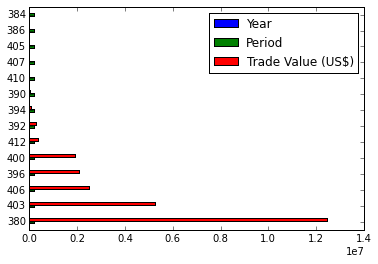

In [57]:
# palm oil november graph, geddit?
pong = palmOilImportsInNov2014.sort("Trade Value (US$)", ascending=False)
trade = palmOilImportsInNov2014["Trade Value (US$)"]
partner = palmOilImportsInNov2014["Partner"]
pong.plot(kind='barh')

this isn't the graph I want. I don't know how to only show the partners in the y axis, and trade in the x-axis without triggering this error:

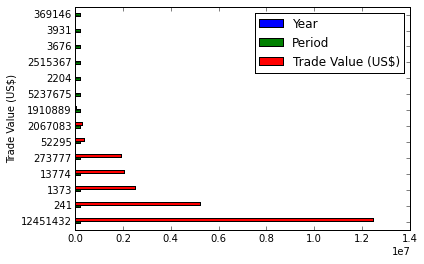

In [59]:
pong.plot(kind='barh', x=trade)

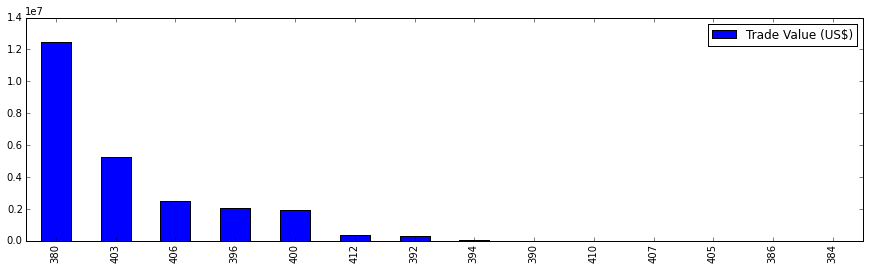

In [63]:
newPong = pong[["Trade Value (US$)", "Partner"]]
newPong.plot(kind='bar', figsize=(15, 4))

Okay, so the problem is that we aren't using the correct index, for the countries?

Okay, that's fixable:

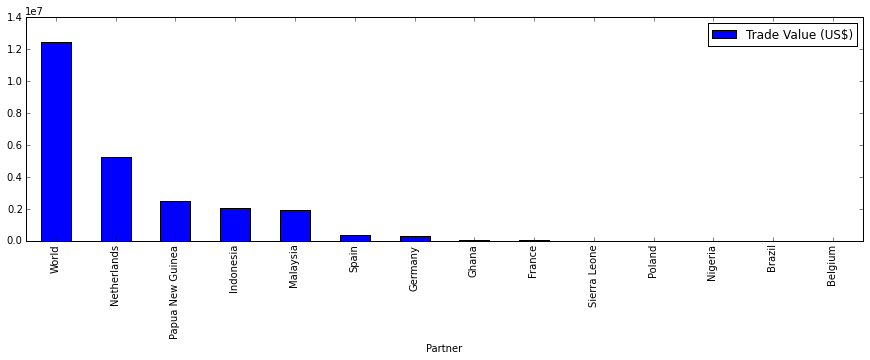

In [67]:
newPong.index = newPong["Partner"]
newPong.plot(kind='bar', figsize=(15, 4))

Lets get rid of the world:

In [73]:

#newPongNoWorld.plot(kind='bar', figsize=(15,4))
newPong.dtypes


Trade Value (US$)     int64
Partner              object
dtype: object

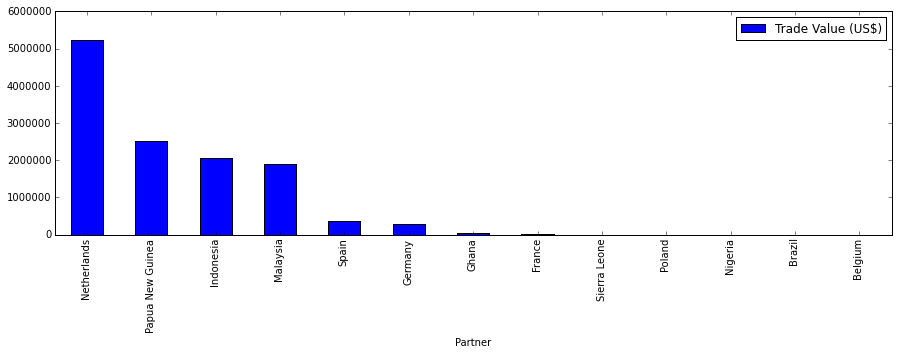

In [78]:
newPong[newPong["Partner"] != "World"].plot(kind='bar', figsize=(15, 4))

**Now go back to the Exercise 1 step in FutureLearn to discuss and mark it complete.**

## Exercise 2: Grouping data

On many occasions, a dataframe may be organised as groups of rows where the group membership is identified based on cell values within one or more 'key' columns. **Grouping** refers to the process whereby rows associated with a particular group are collated so that you can work with just those rows as distinct subsets of the whole dataset.

The number of groups the dataframe will be split into is based on the number of unique values identified within a single key column, or the number of unique combinations of values for two or more key columns.

The `groupby()` method runs down each row in data frame, splitting the rows into separate groups based on the unique values associated with the key column or columns.

The following is an example of the steps and code needed to split the dataframe from the Exercise 1 example. 

### Grouping the data

Split the data into two different subsets of data (imports and exports), by grouping on trade flow.

In [79]:
groups = milk_countries.groupby('Trade Flow')

Inspect the first few rows associated with a particular group:

In [80]:
groups.get_group('Imports').head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
111,2014,201410,Imports,United Kingdom,Austria,"Milk and cream, concentrated or sweetened",0402,423018
113,2014,201409,Imports,United Kingdom,Austria,"Milk and cream, concentrated or sweetened",0402,230809
116,2014,201411,Imports,United Kingdom,Austria,"Milk and cream, concentrated or sweetened",0402,144989
131,2014,201404,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,3258041
133,2014,201403,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,2258058


As well as grouping on a single term, you can create groups based on multiple columns by passing in several column names as a list. For example, generate groups based on commodity code *and* trade flow, and then preview the keys used to define the groups.

In [ ]:
GROUPING_COMMFLOW = ['Commodity Code','Trade Flow']

groups = milk_countries.groupby(GROUPING_COMMFLOW)
groups.groups.keys()

Retrieve a group based on multiple group levels by passing in a tuple that specifies a value for each index column. For example, if a grouping is based on the `'Partner'` and `'Trade Flow'` columns, the argument of `get_group` has to be a partner/flow pair, like `('France', 'Import')` to  get all rows associated with imports from France.

In [ ]:
GROUPING_PARTNERFLOW = ['Partner','Trade Flow']
groups = milk_countries.groupby(GROUPING_PARTNERFLOW)

GROUP_PARTNERFLOW= ('France','Imports')
groups.get_group( GROUP_PARTNERFLOW )

To find the leading partner for a particular commodity, group by commodity, get the desired group, and then sort the result.

In [ ]:
groups = milk_countries.groupby(['Commodity Code'])
groups.get_group('0402').sort("Trade Value (US$)", ascending=False).head()

### Task

Using your own data set from Exercise 1, try to group the data in a variety of ways, finding the most significant trade partner in each case:

- by commodity, or commodity code
- by trade flow, commodity and year.

Let's start with our palm oil countries again.

In [82]:
palmOilCountries.head(5)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
2,2014,201401,Exports,United Kingdom,Australia,"Palm oil and its fractions, not chemically mod...",1511,17614
3,2014,201401,Exports,United Kingdom,Austria,"Palm oil and its fractions, not chemically mod...",1511,1614
4,2014,201401,Exports,United Kingdom,Belgium,"Palm oil and its fractions, not chemically mod...",1511,33057
5,2014,201401,Imports,United Kingdom,Brazil,"Palm oil and its fractions, not chemically mod...",1511,1663182
6,2014,201401,Exports,United Kingdom,Brazil,"Palm oil and its fractions, not chemically mod...",1511,20261


We'd like to find out the biggest _exporter_ of Palm Oil. To do this, we'll need to group our countries by trade flow, and the partner

In [83]:
TRADEFLOW_PARTNERS = ["Trade Flow", "Partner"]
palmOilCountries.groupby(TRADEFLOW_PARTNERS)

Actually, no, that won't help. We really need to group by Trade Flow, and sort by trade value

In [84]:
tradeflows = palmOilCountries.groupby("Trade Flow")
tradeflows.get_group("Exports").sort("Trade Value (US$)", ascending=False).head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
436,2014,201412,Exports,United Kingdom,Ireland,"Palm oil and its fractions, not chemically mod...",1511,2879933
130,2014,201404,Exports,United Kingdom,Ireland,"Palm oil and its fractions, not chemically mod...",1511,2745945
209,2014,201406,Exports,United Kingdom,Ireland,"Palm oil and its fractions, not chemically mod...",1511,2465074
92,2014,201403,Exports,United Kingdom,Ireland,"Palm oil and its fractions, not chemically mod...",1511,2302337
17,2014,201401,Exports,United Kingdom,Ireland,"Palm oil and its fractions, not chemically mod...",1511,2201263


So, Ireland is the most biggest importer of Palm Oil from the UK, in December.

What were they like compared to others in December though? We can group by Export and Period, and fetch 201412, and Import to check this:

In [86]:
tradeflows = palmOilCountries.groupby(["Trade Flow", "Period"])
tradeflows.get_group(("Exports", 201412)).sort("Trade Value (US$)", ascending=False).head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
436,2014,201412,Exports,United Kingdom,Ireland,"Palm oil and its fractions, not chemically mod...",1511,2879933
443,2014,201412,Exports,United Kingdom,Netherlands,"Palm oil and its fractions, not chemically mod...",1511,773427
432,2014,201412,Exports,United Kingdom,Germany,"Palm oil and its fractions, not chemically mod...",1511,207161
430,2014,201412,Exports,United Kingdom,France,"Palm oil and its fractions, not chemically mod...",1511,154971
441,2014,201412,Exports,United Kingdom,Malta,"Palm oil and its fractions, not chemically mod...",1511,84898


Ah, it's the Netherlands again.

Weird, they were the biggest importer in November.

**Now go back to the Exercise 2 step in FutureLearn to discuss and mark it complete.**

## Exercise 3: Experimenting with Split-Apply-Combine – Summary reports

Having learned how to group data using the `groupby()` method, you will now start to put those groups to work.

### Aggregation operations – Generating *Summary* reports

Aggegration operations can be invoked using the `aggregate()` method.

To find the total value of imports traded for each commodity within the period, take the world dataframe, and sum the values over the trade value column within each grouping.

In [110]:
milk_world_imports.groupby('Commodity Code')['Trade Value (US$)'].aggregate(sum)

Commodity Code
0401    222107770
0402    341777173
Name: Trade Value (US$), dtype: int64

So that's 222 million dollars or so on the 0401 commodity, and 341 million dollars or so on 0402.

If you total (sum) up all the individual country contributions, you should get similar amounts.

In [111]:
milk_imports_grouped=milk_countries_imports.groupby('Commodity Code')
milk_imports_grouped['Trade Value (US$)'].aggregate(sum)

Commodity Code
0401    222107771
0402    341777171
Name: Trade Value (US$), dtype: int64

Not far off – there are perhaps a few rounding errors that would account for the odd couple of million that appear to be missing...

###Finding top ranked elements within a group

To find the leading import partners across all the milk products, group by partner, sum (total) the trade value within each group, and then sort the result in descending order before displaying the top few entries.

In [112]:
milk_countries_imports_totals=milk_countries_imports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
milk_countries_imports_totals.sort('Trade Value (US$)', ascending=False).head()

,Trade Value (US$)
Partner,
Ireland,174315886
France,105008176
Germany,76612700
Netherlands,72209235
Belgium,58338745


### Generating simple charts

One of the useful features of the `aggregate()` method is that it returns an object that can be plotted from directly, in this example a horizontal bar chart.

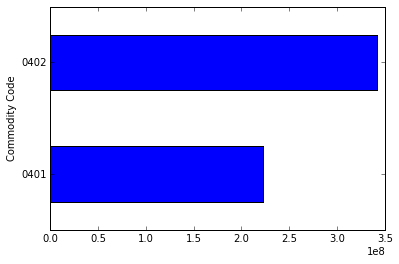

In [113]:
milk_imports_grouped['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

### Generating alternative groupings

Reports can also be generated to show the total imports per month for each commodity: group on commodity, trade flow and period, and then sum the trade values contained within each group.

In [108]:
monthlies=milk_countries_imports.groupby(['Commodity','Trade Flow','Period'])['Trade Value (US$)'].aggregate(sum)
monthlies

Commodity                                           Trade Flow  Period
Milk and cream, concentrated or sweetened           Imports     201401    30423330
                                                                201402    20614513
                                                                201403    26335257
                                                                201404    24770338
                                                                201405    26409462
                                                                201406    29081876
                                                                201407    25668642
                                                                201408    23360790
                                                                201409    37418160
                                                                201410    38012444
                                                                201411    39465351
                

The `groupby()` method *splits* the data into separate distinct groups of rows, and then the `aggregate()` method takes each group of rows from the results of the `groupby()` operation, *applies* the specified aggregation function, and then *combines* the results in the output. 

The aggregation function itself is applied to all columns of an appropriate type. In the example, the only numeric column that makes sense to aggregate over is the trade value column.

As well as built in summary operations, such as finding the total (`sum`), or maximum or minimum value in a group (`max`, `min`), aggregating functions imported from other Python packages can also be used. As shown in the next example, the `numpy` package has a function `mean` that will calculate the mean (simple average) value for a set of values.

### Generating several aggregation values at the same time
To generate several aggregate reports in a single line of code, provide a list of several aggregating operations to the `aggregate()` method:

In [ ]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['Commodity','Trade Flow','Period']
milk_countries.groupby(GROUPING_COMMFLOWPERIOD)['Trade Value (US$)'].aggregate([sum, min, max, mean])

By combining different grouping combinations and aggregate functions, you can quickly ask a range of questions over the data or generate a wide variety of charts from it.

Sometimes, however,  it can be quite hard to see any 'outstanding' values in a complex pivot table. In such cases, a chart may help you see which values are significantly larger or smaller than the other values.

For example, plot the maximum value by month across each code/period combination to see which month saw the maximum peak flow of imports from a single partner.

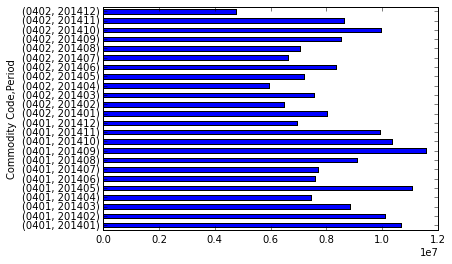

In [109]:
milk_countries_imports.groupby(['Commodity Code','Period'])['Trade Value (US$)'].aggregate(max).plot(kind='barh')

For the 0401 commodity, the largest single monthly trade flow in 2014 appears to have taken place in September (201409). For the 0402 commodity, the weakest month was December, 2014.

To chart the mean trade flows by month, simply aggregate on the *mean* rather than the `max`.

In some cases, you might want to sort the order of the bars in a bar chart by value. By default, the `sort()` operator sorts a series or dataframe 'in place'. That is, it sorts the dataframe and doesn't return anything. Use the `inplace=False` parameter to return the sorted values so that the plot function can work on them, or alternatively use the `order()` function.

The following chart displays the total imports for the combined commodities by partner (including the *World* partner) for the top five partners: the `sort()` element sorts the values in descending order, passes them to the `head()` element, which selects the top five and passes those onto the plotting function.

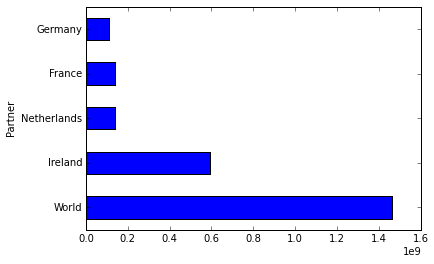

In [114]:
milk_bypartner_total=milk.groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
milk_bypartner_total.sort('Trade Value (US$)',inplace=False,ascending=False).head(5).plot(kind='barh')
#milk_bypartner_total.order('Trade Value (US$)',ascending=False).head(5).plot(kind='barh')

### Tasks

For the 0402 trade item, which months saw the greatest average (mean) activity? How does that compare with the maximum flows in each month? How does it compare with the total flow in each month?

Download your own choice of monthly dataset over one or two years containing both import and export data. (To start with, you may find it convenient to split the data into two dataframes, one for exports and one for imports.)

Using your own data:

- find out which months saw the largest total value of imports, or exports? 
- assess, by eye, if there appears to be any seasonal trend in the behaviour of imports or exports?
- plot a bar chart showing the top three importers or exporters of your selected trade item over the period you grabbed the data for, compared to the total world trade value.


### Aggregation operations – Generating *Summary* reports

We can check trade by grouping by period, then aggregrating it.

In [99]:
palmOilWorld.dtypes

Year                  int64
Period                int64
Trade Flow           object
Reporter             object
Partner              object
Commodity            object
Commodity Code       object
Trade Value (US$)     int64
dtype: object

In [104]:
palmOilWorld.groupby("Period").aggregate(sum)


,Year,Trade Value (US$)
Period,,
201401,4028,33685544
201402,4028,32866754
201403,4028,40821245
201404,4028,34407653
201405,4028,31947843
201406,6042,29372805
201407,4028,61961959
201408,4028,16715263
201409,4028,38592011


We can lose the nonsensical year value by making a new dataframe we pass into the groupby:

In [105]:
palmOilWorldSales = palmOilWorld[["Period", "Trade Value (US$)"]]
palmOilWorldSales.groupby("Period").aggregate(sum)

,Trade Value (US$)
Period,
201401,33685544
201402,32866754
201403,40821245
201404,34407653
201405,31947843
201406,29372805
201407,61961959
201408,16715263
201409,38592011


And we can make this easier to read, by plotting

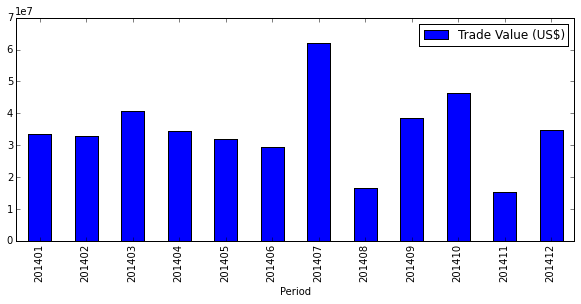

In [107]:
palmOilWorldSales.groupby("Period").aggregate(sum).plot(kind='bar', figsize=(10,4))

As you can see, there's a big spike in summer.

###Finding top ranked elements within a group

To find the leading import partners of palm oil, group by partner, sum (total) the trade value within each group, and then sort the result in descending order before displaying the top few entries.

In [116]:
palmOilCountriesImports.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
5,2014,201401,Imports,United Kingdom,Brazil,"Palm oil and its fractions, not chemically mod...",1511,1663182
7,2014,201401,Imports,United Kingdom,Solomon Isds,"Palm oil and its fractions, not chemically mod...",1511,2004587
11,2014,201401,Imports,United Kingdom,France,"Palm oil and its fractions, not chemically mod...",1511,43918
13,2014,201401,Imports,United Kingdom,Germany,"Palm oil and its fractions, not chemically mod...",1511,301684
15,2014,201401,Imports,United Kingdom,Ghana,"Palm oil and its fractions, not chemically mod...",1511,58990


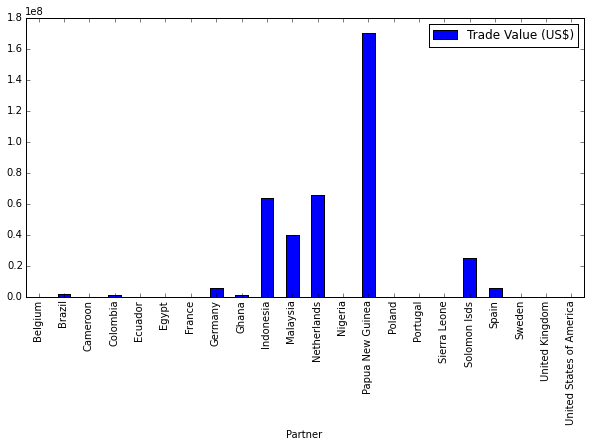

In [129]:
# acpoi => annual country palm oil imports 
acpoi = palmOilCountriesImports[["Trade Value (US$)", "Partner"]]
acpoi.groupby("Partner").aggregate(sum).plot(kind='bar', figsize=(10,5))

Wow, PNG is so much higher than everything else. We might need to use a log scale here.

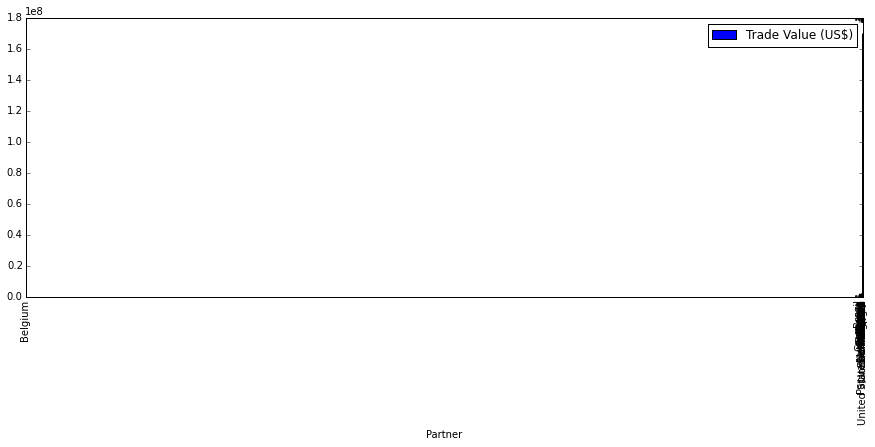

In [135]:
acpoi.groupby("Partner").aggregate(sum).plot(kind='bar', figsize=(15,5), logx=True)

### Nope. That didn't help at all

Also, splitting this across two lines gives me weird results.

In [ ]:
grapho = acpoi.groupby("Partner").aggregate(sum)

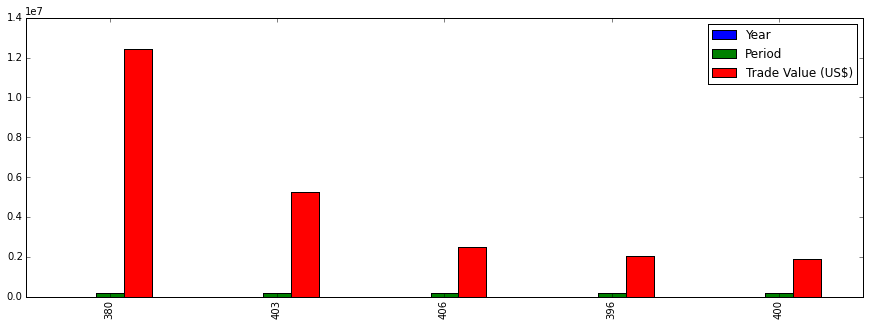

In [131]:
grapho.plot(logx=True, kind='bar', figsize=(15,5))

Nope. That didn't help. What did I do wrong? Meh. Not bothered. However...

In [166]:
def top3(g):
    """ 
    Returns the top 3 trades in palm oil for each month.
    """
    return g.sort("Trade Value (US$)", ascending=False).head(2)
    
# not palmOilWorldSales.groupby("Period").aggregate(sum)

Whoops! Didn't filter the years. I'm not sure how to do this, actually. I might need to come back in a bit.

In [153]:
palmOilWorldSales.groupby("Period").apply(top3)

Period  Trade Value (US$)
Period                               
201401 0    201401           30453298
       1    201401            3232246
201402 37   201402           29950202
       38   201402            2916552
201403 73   201403           37723949
       74   201403            3097296
201404 113  201404           30888330
       114  201404            3519323
201405 149  201405           28891074
       150  201405            3056769
201406 188  201406           25941229
       189  201406            3429534
201407 231  201407           60149143
       232  201407            1812816
201408 268  201408           14706640
       269  201408            2008623
201409 306  201409           35478934
       307  201409            3113077
201410 342  201410           43713838
       343  201410            2817757
201411 380  201411           12451432
       381  201411            2866522
201412 419  201412           30568455
       420  201412            4351760

This isn't quite what we need. Maybe we need the index again.

In [154]:
palmOilWorldSales.index

Int64Index([  0,   1,  37,  38,  73,  74, 113, 114, 149, 150, 188, 189, 190,
            231, 232, 268, 269, 306, 307, 342, 343, 380, 381, 419, 420],
           dtype='int64')

In [156]:
palmOilWorldSales.keys

<bound method DataFrame.keys of      Period  Trade Value (US$)
0    201401           30453298
1    201401            3232246
37   201402           29950202
38   201402            2916552
73   201403           37723949
74   201403            3097296
113  201404           30888330
114  201404            3519323
149  201405           28891074
150  201405            3056769
188  201406           25941229
189  201406            3429534
190  201406               2042
231  201407           60149143
232  201407            1812816
268  201408           14706640
269  201408            2008623
306  201409           35478934
307  201409            3113077
342  201410           43713838
343  201410            2817757
380  201411           12451432
381  201411            2866522
419  201412           30568455
420  201412            4351760>

ah, we have no partner column to index on. Lets' try again, sarting with `palmOilWorld`

In [163]:
palmOilWorldSales = palmOilWorld[["Period", "Trade Value (US$)"]]
palmOilWorldSalesCountry = palmOilWorld[["Period", "Trade Flow","Partner", "Trade Value (US$)"]]

Now, with the missing partner column, we should be able to index by the partner, then spit out our report

In [178]:

palmOilWorldSalesCountry.index = palmOilWorldSalesCountry["Trade Flow"]
palmOilWorldSalesCountry.groupby("Period").apply(top3)

Period Trade Flow Partner  Trade Value (US$)
Period Trade Flow                                              
201401 Imports     201401    Imports   World           30453298
       Exports     201401    Exports   World            3232246
201402 Imports     201402    Imports   World           29950202
       Exports     201402    Exports   World            2916552
201403 Imports     201403    Imports   World           37723949
       Exports     201403    Exports   World            3097296
201404 Imports     201404    Imports   World           30888330
       Exports     201404    Exports   World            3519323
201405 Imports     201405    Imports   World           28891074
       Exports     201405    Exports   World            3056769
201406 Imports     201406    Imports   World           25941229
       Exports     201406    Exports   World            3429534
201407 Imports     201407    Imports   World           60149143
       Exports     201407    Exports   World            1812816
201408 Imports     201408    Imports   World           14706640
       Exports     201408    Exports   World            2008623
201409 Imports     201409    Imports   World           35478934
       Exports     201409    Exports   World            3113077
201410 Imports     201410    Imports   World           43713838
       Exports     201410    Exports   World            2817757
201411 Imports     201411    Imports   World           12451432
       Exports     201411    Exports   World            2866522
201412 Imports     201412    Imports   World           30568455
       Exports     201412    Exports   World            4351760

In [181]:
palmOilWorldSalesCountry.groupby(("Period", "Trade Flow")).apply(top3)

Period  Trade Flow Partner  Trade Value (US$)
Period Trade Flow Trade Flow                                               
201401 Exports    Exports     201401     Exports   World            3232246
       Imports    Imports     201401     Imports   World           30453298
201402 Exports    Exports     201402     Exports   World            2916552
       Imports    Imports     201402     Imports   World           29950202
201403 Exports    Exports     201403     Exports   World            3097296
       Imports    Imports     201403     Imports   World           37723949
201404 Exports    Exports     201404     Exports   World            3519323
       Imports    Imports     201404     Imports   World           30888330
201405 Exports    Exports     201405     Exports   World            3056769
       Imports    Imports     201405     Imports   World           28891074
201406 Exports    Exports     201406     Exports   World            3429534
       Imports    Imports     201406     Imports   World           25941229
       Re-imports Re-imports  201406  Re-imports   World               2042
201407 Exports    Exports     201407     Exports   World            1812816
       Imports    Imports     201407     Imports   World           60149143
201408 Exports    Exports     201408     Exports   World            2008623
       Imports    Imports     201408     Imports   World           14706640
201409 Exports    Exports     201409     Exports   World            3113077
       Imports    Imports     201409     Imports   World           35478934
201410 Exports    Exports     201410     Exports   World            2817757
       Imports    Imports     201410     Imports   World           43713838
201411 Exports    Exports     201411     Exports   World            2866522
       Imports    Imports     201411     Imports   World           12451432
201412 Exports    Exports     201412     Exports   World            4351760
       Imports    Imports     201412     Imports   World           30568455

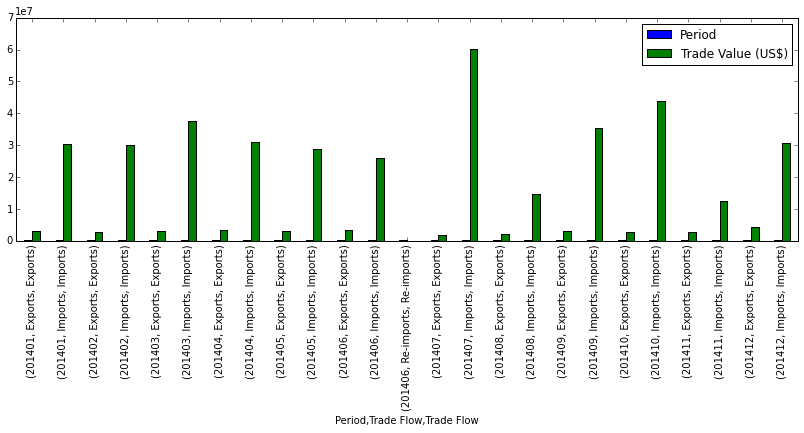

In [183]:
palmOilWorldSalesCountry.groupby(("Period", "Trade Flow")).apply(top3).plot(kind='bar', figsize=(14,4))


We don't want period on the y axis though. Let's get rid of it somehow. _Update: I don't know how to do this yet._

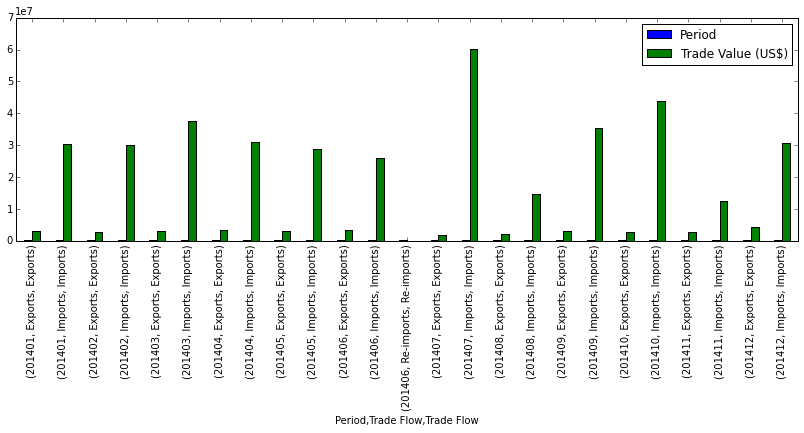

In [188]:
palmOilWorldSalesCountry.groupby(("Period", "Trade Flow")).apply(top3).plot(kind='bar', figsize=(14,4))

Hmm, so we now appear to be getting somewhere, but we still have a few problems. We'll need to do this one more time, on the country breakdown. I'm not sure why World exports are so much lower than imports though.

Ah, it looks like you can filter the results of a groupby, before calling `apply`like so:


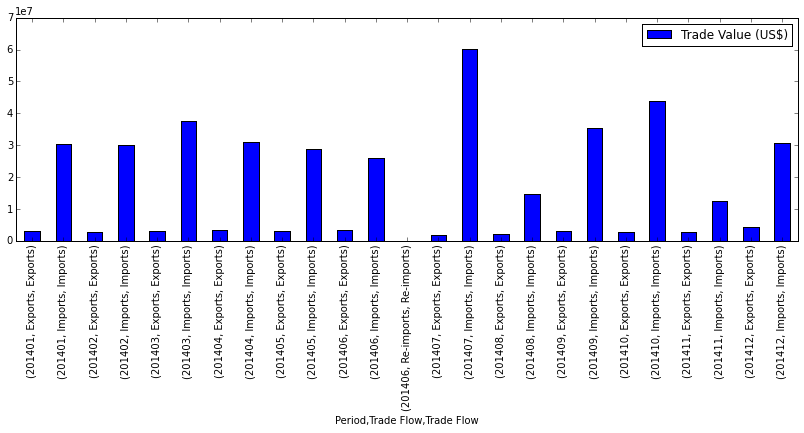

In [191]:
just_trade = palmOilWorldSalesCountry.groupby(("Period", "Trade Flow"))[["Trade Value (US$)"]]

just_trade.apply(top3).plot(kind='bar', figsize=(14,4))

### Sweet! the trick was to pass in a _list_ showing just the `"trade value (US$)"` instead of just the string `"trade value (US$)"`

**Now go back to the Exercise 3 step in FutureLearn to discuss and mark it complete.**

## Exercise 4: Filtering groups

If you have a large dataset that can be split into multiple groups but for which you only want to report on groups that have a particular property, the `filter()` method can be used to apply a test to a group and only return rows from groups that pass a particular group-wide test. If the test evaluates as `False`, the rows included in that group will be ignored.

Consider the following simple test dataset:

In [193]:
df = DataFrame({'Commodity' : ['Fish', 'Milk', 'Eggs', 'Fish', 'Milk'],
                'Trade Flow' : ['Import', 'Import', 'Import', 'Export','Export'],
                'Value' : [1,2,4,8,16]})
df

,Commodity,Trade Flow,Value
0,Fish,Import,1
1,Milk,Import,2
2,Eggs,Import,4
3,Fish,Export,8
4,Milk,Export,16


One reason for filtering a dataset might be to exclude 'sparse' or infrequently occurring items, such as trade partners who only seem to trade for less than six months of the year.

To select just the groups that contain more than a certain number of rows, define a function to test the length (that is, the number of rows) of each group and return a `True` or `False` value depending on the test.

In the following case, group by trade flow and only return rows from groups containing three or more rows.

In [194]:
def groupsOfThreeOrMoreRows(g):
    return len(g) >= 3

df.groupby('Trade Flow').filter(groupsOfThreeOrMoreRows)

,Commodity,Trade Flow,Value
0,Fish,Import,1
1,Milk,Import,2
2,Eggs,Import,4


You can also select groups based on other group properties. For example, you might select just the groups where the total value for a particular column within a group exceeds a certain threshold.

In the following case, select just those commodities where the sum of import and export values is greater than a certain amount to indicate which ones have a large value of trade, in whatever direction, associated with them. First group by the commodity, then filter on the group property of interest.

In [195]:
def groupsWithValueGreaterThanFive(g):
    return g['Value'].sum() > 5

df.groupby('Commodity').filter(groupsWithValueGreaterThanFive)

,Commodity,Trade Flow,Value
0,Fish,Import,1
1,Milk,Import,2
3,Fish,Export,8
4,Milk,Export,16


### Filtering on the Comtrade data

Now try filtering the Comtrade data relating to the milk imports. Start by creating a subset of the data containing only rows where the total trade value of imports for a particular commodity and partner is is greater than $25 million (that is, 25000000).

In [196]:
def groupsWithImportsOver25million(g):
    return g['Trade Value (US$)'].sum() > 25000000

rows=milk_countries_imports.groupby(['Commodity','Partner']).filter(groupsWithImportsOver25million)

Check the filtering by grouping on the commodity and partner and summing the result.

In [197]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum)

Commodity                                           Partner    
Milk and cream, concentrated or sweetened           Belgium         36155409
                                                    France          85631781
                                                    Germany         59776965
                                                    Ireland         62936247
                                                    Netherlands     61531712
Milk and cream, neither concentrated nor sweetened  Denmark         29432607
                                                    Ireland        111379639
Name: Trade Value (US$), dtype: int64

As before, you can plot the results.

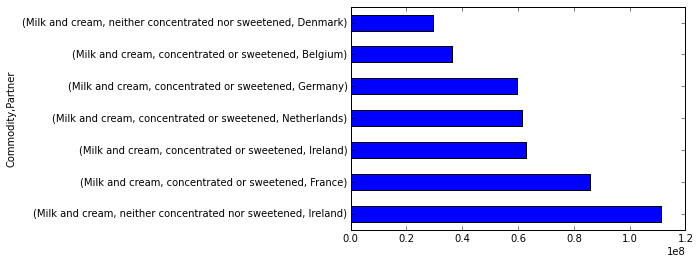

In [198]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum).sort('Trade Value (US$)',inplace=False,ascending=False).plot(kind='barh')

Logical tests can be combined in a filter function, for example testing for partners that only appear to trade infrequently *or* for small total amounts in any particular commodity.

In [201]:
def weakpartner(g):
    return len(g)<=3 | g['Trade Value (US$)'].sum()<25000

weak_milk_countries_imports=milk_countries_imports.groupby(['Commodity','Partner']).filter(weakpartner)
weak_milk_countries_imports.groupby(['Commodity','Partner'])[['Trade Value (US$)']].aggregate([len,sum])

Trade Value (US$)  \
                                                                                          len   
Commodity                                          Partner                                      
Milk and cream, concentrated or sweetened          Greece                                   1   
                                                   Hungary                                  8   
                                                   Latvia                                   1   
                                                   Luxembourg                               1   
                                                   New Zealand                              1   
                                                   United Arab Emirates                     2   
                                                   United States of America                 2   
Milk and cream, neither concentrated nor sweetened Finland                                  1   
                                                   Latvia                                   4   
                                                   Spain                                    1   
                                                   Ukraine                                  1   
                                                   United States of America                 1   

                                                                                    
                                                                               sum  
Commodity                                          Partner                          
Milk and cream, concentrated or sweetened          Greece                        7  
                                                   Hungary                    4956  
                                                   Latvia                      432  
                                                   Luxembourg                23724  
                                                   New Zealand               19291  
                                                   United Arab Emirates       5779  
                                                   United States of America   4375  
Milk and cream, neither concentrated nor sweetened Finland                      12  
                                                   Latvia                     1678  
                                                   Spain                        68  
                                                   Ukraine                    3733  
                                                   United States of America   2415

In this report, many of the listed countries appear to have traded in only one or two months; but while Hungary traded concentrated/sweetened products eight times, the total trade value was not very significant at all.

### Tasks

Filter the dataset so that it only contains rows where the total exports across all the milk products for a particular country are at least two million dollars in any given monthly period. (HINT: group on partner and period and filter against a function that tests the minimum trade value exceeds the required value.)

Generate a chart from that dataset that displays the sum total trade value for each partner. (HINT: group on the partner and then aggregate on the sum.)

Using your own monthly data for a single year, which countries only trade in your selected trade item rarely or for small amounts? Which partners trade on a regular basis (for example, in at least nine of the months)? 

Can you also find countries that trade regularly but only for small amounts (for example whose maximum monthly trade value is less than a certain threshold amount) or who trade infrequently but for large amounts (or other combinations thereof)?

In [220]:
def strongPartner(g):
    return g['Trade Value (US$)'].sum() > (2 * 1000 * 1000)

strong_milk_countries_imports = milk_countries_imports.groupby(['Commodity','Partner', "Period"]).filter(strongPartner)

In [230]:
strong_annual_milk_imports_by_country = strong_milk_countries_imports.groupby(['Partner'])[['Trade Value (US$)']]
strong_annual_milk_imports_by_country.aggregate(sum)

,Trade Value (US$)
Partner,
Belgium,43098706
Denmark,27459714
France,87728552
Germany,64332679
Ireland,174315886
Netherlands,61531712
Spain,5061259


_you can chain groupby calls so you can use one set of groupings for filters, then another groupby to arrange a bar chart_

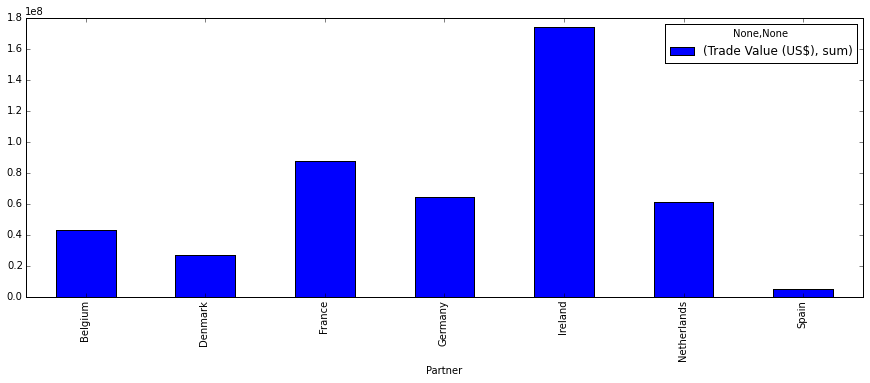

In [221]:
strong_annual_milk_imports_by_country = strong_milk_countries_imports.groupby(['Partner'])[['Trade Value (US$)']].aggregate([sum])
strong_annual_milk_imports_by_country.plot(kind='bar', figsize=(15,5))

Lets' check this by month as well though:

> Using your own monthly data for a single year, which countries only trade in your selected trade item rarely or for small amounts? Which partners trade on a regular basis (for example, in at least nine of the months)? 

#### First of all, break it down commodity partner to count the months of trade for each commodity

In [241]:
strong_monthly_milk_imports_by_country = strong_milk_countries_imports.groupby(['Partner',"Commodity"])[['Trade Value (US$)']]
strong_monthly_milk_imports_by_country.aggregate([len, sum])

Trade Value (US$)  \
                                                                             len   
Partner     Commodity                                                              
Belgium     Milk and cream, concentrated or sweetened                          9   
            Milk and cream, neither concentrated nor sweetened                 4   
Denmark     Milk and cream, neither concentrated nor sweetened                11   
France      Milk and cream, concentrated or sweetened                         12   
            Milk and cream, neither concentrated nor sweetened                 1   
Germany     Milk and cream, concentrated or sweetened                         12   
            Milk and cream, neither concentrated nor sweetened                 2   
Ireland     Milk and cream, concentrated or sweetened                         12   
            Milk and cream, neither concentrated nor sweetened                12   
Netherlands Milk and cream, concentrated or sweetened                         12   
Spain       Milk and cream, concentrated or sweetened                          2   

                                                                           
                                                                      sum  
Partner     Commodity                                                      
Belgium     Milk and cream, concentrated or sweetened            30403010  
            Milk and cream, neither concentrated nor sweetened   12695696  
Denmark     Milk and cream, neither concentrated nor sweetened   27459714  
France      Milk and cream, concentrated or sweetened            85631781  
            Milk and cream, neither concentrated nor sweetened    2096771  
Germany     Milk and cream, concentrated or sweetened            59776965  
            Milk and cream, neither concentrated nor sweetened    4555714  
Ireland     Milk and cream, concentrated or sweetened            62936247  
            Milk and cream, neither concentrated nor sweetened  111379639  
Netherlands Milk and cream, concentrated or sweetened            61531712  
Spain       Milk and cream, concentrated or sweetened             5061259

But this only shows the strong traders. Let's go back to the initial dataframe.

In [246]:
milk_countries_imports.groupby(["Partner", "Commodity"])[["Trade Value (US$)"]].aggregate([len, sum])

Trade Value (US$)  \
                                                                                          len   
Partner                  Commodity                                                              
Austria                  Milk and cream, concentrated or sweetened                          3   
Belgium                  Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                12   
Czech Rep.               Milk and cream, concentrated or sweetened                          7   
                         Milk and cream, neither concentrated nor sweetened                 2   
Denmark                  Milk and cream, concentrated or sweetened                          7   
                         Milk and cream, neither concentrated nor sweetened                12   
Finland                  Milk and cream, neither concentrated nor sweetened                 1   
France                   Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                12   
Germany                  Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                12   
Greece                   Milk and cream, concentrated or sweetened                          1   
Hungary                  Milk and cream, concentrated or sweetened                          8   
Ireland                  Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                12   
Italy                    Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                12   
Latvia                   Milk and cream, concentrated or sweetened                          1   
                         Milk and cream, neither concentrated nor sweetened                 4   
Lithuania                Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                12   
Luxembourg               Milk and cream, concentrated or sweetened                          1   
Netherlands              Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                12   
New Zealand              Milk and cream, concentrated or sweetened                          1   
Poland                   Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                12   
Portugal                 Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                11   
Romania                  Milk and cream, neither concentrated nor sweetened                12   
Slovakia                 Milk and cream, concentrated or sweetened                          7   
                         Milk and cream, neither concentrated nor sweetened                 3   
Spain                    Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                 1   
Sweden                   Milk and cream, concentrated or sweetened                         12   
                         Milk and cream, neither concentrated nor sweetened                11   
Ukraine                  Milk and cream, neither concentrated nor sweetened                 1   
United Arab Emirates     Milk and cream, concentrated or sweetened                          2   
  

Now, lets filter this by weak traders one more time.

In [252]:
TV = "Trade Value (US$)"
weak_milk_countries_imports
weak_milk_countries_imports.groupby(["Partner", "Commodity","Period"]).aggregate([len, sum])[TV]

len  \
Partner                  Commodity                                          Period        
Finland                  Milk and cream, neither concentrated nor sweetened 201402    1   
Greece                   Milk and cream, concentrated or sweetened          201405    1   
Hungary                  Milk and cream, concentrated or sweetened          201404    1   
                                                                            201406    1   
                                                                            201407    1   
                                                                            201408    1   
                                                                            201409    1   
                                                                            201410    1   
                                                                            201411    1   
                                                                            201412    1   
Latvia                   Milk and cream, concentrated or sweetened          201410    1   
                         Milk and cream, neither concentrated nor sweetened 201404    1   
                                                                            201406    1   
                                                                            201409    1   
                                                                            201411    1   
Luxembourg               Milk and cream, concentrated or sweetened          201403    1   
New Zealand              Milk and cream, concentrated or sweetened          201406    1   
Spain                    Milk and cream, neither concentrated nor sweetened 201401    1   
Ukraine                  Milk and cream, neither concentrated nor sweetened 201402    1   
United Arab Emirates     Milk and cream, concentrated or sweetened          201404    1   
                                                                            201410    1   
United States of America Milk and cream, concentrated or sweetened          201402    1   
                                                                            201404    1   
                         Milk and cream, neither concentrated nor sweetened 201404    1   

                                                                                      sum  
Partner                  Commodity                                          Period         
Finland                  Milk and cream, neither concentrated nor sweetened 201402     12  
Greece                   Milk and cream, concentrated or sweetened          201405      7  
Hungary                  Milk and cream, concentrated or sweetened          201404    346  
                                                                            201406   1065  
                                                                            201407    734  
                                                                            201408    292  
                                                                            201409    284  
                                                                            201410    623  
                                                                            201411   1201  
                                                                            201412    411  
Latvia                   Milk and cream, concentrated or sweetened          201410    432  
                         Milk and cream, neither concentrated nor sweetened 201404    567  
                                                                            201406    250  
                                                                            201409    440  
                                                                            201411    421  
Luxembourg               Milk and cream, concentrated or sweetened          201403  23724  
New Zealand              Milk and cream, concentrated or swee



> Which partners trade on a regular basis (for example, in at least nine of the months)? 

In [279]:
def atleastNineTradingMonths(g):
    return len(g) >= 9


How add lets see what we get back

In [282]:
regular_partners = milk_countries_imports.groupby(["Commodity"]).filter(atleastNineTradingMonths)
regular_partners.groupby(["Partner", "Commodity", "Period"])[TV].aggregate([len])

len
Partner                  Commodity                                          Period     
Austria                  Milk and cream, concentrated or sweetened          201409    1
                                                                            201410    1
                                                                            201411    1
Belgium                  Milk and cream, concentrated or sweetened          201401    1
                                                                            201402    1
                                                                            201403    1
                                                                            201404    1
                                                                            201405    1
                                                                            201406    1
                                                                            201407    1
                                                                            201408    1
                                                                            201409    1
                                                                            201410    1
                                                                            201411    1
                                                                            201412    1
                         Milk and cream, neither concentrated nor sweetened 201401    1
                                                                            201402    1
                                                                            201403    1
                                                                            201404    1
                                                                            201405    1
                                                                            201406    1
                                                                            201407    1
                                                                            201408    1
                                                                            201409    1
                                                                            201410    1
                                                                            201411    1
                                                                            201412    1
Czech Rep.               Milk and cream, concentrated or sweetened          201404    1
                                                                            201405    1
                                                                            201406    1
...                                                                                 ...
Sweden                   Milk and cream, concentrated or sweetened          201408    1
                                                                            201409    1
                                                                            201410    1
                                                                            201411    1
                                                                            201412    1
                         Milk and cream, neither concentrated nor sweetened 201401    1
                                                                            201402    1
                                                                            201403    1
                                                                            201404    1
                                                                            201405    1
                                                                            201406    1
                                                                            201407    1
                                                                            201408    1
                                    

Ths problem here is that some of these trading partners have less than 9 trading months. What am I doing wrong?


Ah, found it. I need to group by Partner, otherwise we _only_ have a single grouping to count up inside.

In [288]:
regular_partners = milk_countries_imports.groupby(["Partner", "Commodity"]).filter(atleastNineTradingMonths)
regular_partners.groupby(["Partner", "Commodity"])[TV].aggregate([len])

len
Partner     Commodity                                              
Belgium     Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   12
Denmark     Milk and cream, neither concentrated nor sweetened   12
France      Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   12
Germany     Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   12
Ireland     Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   12
Italy       Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   12
Lithuania   Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   12
Netherlands Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   12
Poland      Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   12
Portugal    Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   11
Romania     Milk and cream, neither concentrated nor sweetened   12
Spain       Milk and cream, concentrated or sweetened            12
Sweden      Milk and cream, concentrated or sweetened            12
            Milk and cream, neither concentrated nor sweetened   11

> Can you also find countries that trade regularly but only for small amounts (for example whose maximum monthly trade value is less than a certain threshold amount) or who trade infrequently but for large amounts (or other combinations thereof)?

In [304]:
def big_but_infrequent(g):
    return len(g) <  6 and g[TV].sum() > (10 * 1000)

infrequent_big_spenders = milk_countries_imports.groupby(["Partner", "Commodity"]).filter(big_but_infrequent)
infrequent_big_spenders.groupby(["Partner", "Commodity"])[TV].aggregate([len, sum])

,,len,sum
Partner,Commodity,,
Austria,"Milk and cream, concentrated or sweetened",3,798816
Czech Rep.,"Milk and cream, neither concentrated nor sweetened",2,76403
Luxembourg,"Milk and cream, concentrated or sweetened",1,23724
New Zealand,"Milk and cream, concentrated or sweetened",1,19291
Slovakia,"Milk and cream, neither concentrated nor sweetened",3,89615


In [311]:
def regular_but_frugal(g):
    return len(g) >  6 and g[TV].sum() < (2 * 1000 * 1000)

regular_but_frugal_spenders = milk_countries_imports.groupby(["Partner", "Commodity"]).filter(regular_but_frugal)
regular_but_frugal_spenders.groupby(["Partner", "Commodity"])[TV].aggregate([len, sum])

len  \
Partner              Commodity                                                 
Czech Rep.           Milk and cream, concentrated or sweetened             7   
Denmark              Milk and cream, concentrated or sweetened             7   
Hungary              Milk and cream, concentrated or sweetened             8   
Italy                Milk and cream, neither concentrated nor sweetened   12   
Lithuania            Milk and cream, concentrated or sweetened            12   
                     Milk and cream, neither concentrated nor sweetened   12   
Portugal             Milk and cream, concentrated or sweetened            12   
                     Milk and cream, neither concentrated nor sweetened   11   
Slovakia             Milk and cream, concentrated or sweetened             7   
Sweden               Milk and cream, neither concentrated nor sweetened   11   
United Arab Emirates Milk and cream, neither concentrated nor sweetened    8   

                                                                             sum  
Partner              Commodity                                                    
Czech Rep.           Milk and cream, concentrated or sweetened           1178586  
Denmark              Milk and cream, concentrated or sweetened           1102035  
Hungary              Milk and cream, concentrated or sweetened              4956  
Italy                Milk and cream, neither concentrated nor sweetened    81328  
Lithuania            Milk and cream, concentrated or sweetened            484493  
                     Milk and cream, neither concentrated nor sweetened    93164  
Portugal             Milk and cream, concentrated or sweetened            121342  
                     Milk and cream, neither concentrated nor sweetened   125465  
Slovakia             Milk and cream, concentrated or sweetened            529810  
Sweden               Milk and cream, neither concentrated nor sweetened   769634  
United Arab Emirates Milk and cream, neither concentrated nor sweetened    38267


**Now go back to the Exercise 4 step in FutureLearn to discuss and mark it complete.**

## Exercise 5: Interactive pivot table

The interactive pivot table contains a fragment of the milk data downloaded from Comtrade relating to the leading partner importers of milk products to the UK. (**Note:** If you can't see the pivot table, check you have downloaded it to the same folder as this notebook and run the cell below.)

Configure the pivot table by dragging the labels into the appropriate row and column selection areas. (You do not need to add all the labels to those areas). Select the aggregation type using the calculation list (which defauts to *count*). Click on the down arrow associated with a label in order to select a subset of values associated with that label.

Use the interactive pivot table to generate reports that display:

- a single column containing the total value of each trade flow for each commodity  each year (in rows: Year, Commodity, Trade Flow; no columns; sum Trade Value(US$))
- for each year and each commodity, a column containing the total trade value by Trade flow (rows: year, commodity; cols Trade Flow; sum trade value)
- the total exports for each partner country (rows) by year (columns). Row: partner, trade flow with filter set to export); col: year; sum trade value

In [312]:
from IPython.display import HTML,IFrame

IFrame('comtrade_pivot.html',width=1000,height=600)


## Task

Try to come up with some of your own questions and then see if you can use the pivot table to answer them.

For example, see if you can use the table to find:

- the total value by partner country of each commodity type (with each row corresponding to a particular country)
- the total value of trade in commodity type for each month of the year
- the leading partners associated with the 0402 commodity code
- the minimum trade value, by month and commodity type, for Ireland.


**Now go back to the Exercise 5 step in FutureLearn to discuss and mark it complete.**

## Exercise 6: Pivot tables with pandas


Pivot tables can be quite hard to understand, so if you want a gentle dataset to pratice with, here is the simple example dataset used in the previous step that you can try out a few pivot table functions on.

In [313]:
#Example dataframe
df = DataFrame({"Commodity":["A","A","A","A","B","B","B","C","C"],
                  "Amount":[10,15,5,20,10,10,5,20,30],
                  "Reporter":["P","P","Q","Q","P","P","Q","P","Q"],
                  "Flow":["X","Y","X","Y","X","Y","X","X","Y"]},
                 columns=["Commodity","Reporter","Flow","Amount"])

df

,Commodity,Reporter,Flow,Amount
0,A,P,X,10
1,A,P,Y,15
2,A,Q,X,5
3,A,Q,Y,20
4,B,P,X,10
5,B,P,Y,10
6,B,Q,X,5
7,C,P,X,20
8,C,Q,Y,30


### Getting started with pivot tables in pandas 

The pandas library provides a `pivot_table()` function into which you can pass the elements needed to define the pivot table view you would like to generate over a particular dataset.

If you inspect the documentation for the pandas `pivot_table()` function, you will see that it is quite involved (but *DON'T PANIC!*).

In [314]:
##Inspect the documentation for the pandas pivot_table() function
##Uncomment the following command (remove the #) and then click the play button in the toolbar to run the cell
?pivot_table
##The documentation file should pop up from the bottom of the browser.
##Click the x to close it.

You can start to use the pivot table quite straightforwardly, drawing inspiration from the way you configured the interactive pivot table. The function itself takes the form:

`pd.pivot_table(DATAFRAME,
                index= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_ROWS,
                columns= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_COLUMNS
                values= DATA_COLUMN_TO_APPLY_THE SUMMARYFUNCTION_TO,
                aggfunc=sum
               )`


You can generate a pivot table that shows the total trade value as a single column, grouped into row based subdivisions based on year, country, trade flow and commodity in the following way.

The following pivot table reports on a subset of countries. The `isin()` method selects rows whose partner value 'is in' the list of specified partners.

In [315]:
KEYPARTNERS=['Belgium','France','Germany','Ireland','Netherlands','Denmark']
milk_keypartners = milk_countries[milk_countries['Partner'].isin(KEYPARTNERS)]

pivot_table(milk_keypartners,
               index=['Year','Partner','Trade Flow','Commodity'],
               values='Trade Value (US$)',
               aggfunc=sum)

Year  Partner      Trade Flow  Commodity                                         
2014  Belgium      Exports     Milk and cream, concentrated or sweetened               6301229
                               Milk and cream, neither concentrated nor sweetened     23041778
                   Imports     Milk and cream, concentrated or sweetened              36155409
                               Milk and cream, neither concentrated nor sweetened     22183336
      Denmark      Exports     Milk and cream, concentrated or sweetened               1849170
                               Milk and cream, neither concentrated nor sweetened      1059287
                   Imports     Milk and cream, concentrated or sweetened               1102035
                               Milk and cream, neither concentrated nor sweetened     29432607
      France       Exports     Milk and cream, concentrated or sweetened               9025441
                               Milk and cream, neither concentr

If you just want to use a single data column from the original dataset to specify the row (that is, the `index`) groupings or the column groupings, you don't need to use a list, just pass in the name of the appropriate original data column.

So, to look at rows grouped by year, country and commodity, and split columns out by trade flow:

In [316]:
#For convenience, let's assign the output of this pivot table operation to a variable...
report=pivot_table(milk_keypartners,
               index=['Year','Partner','Commodity'],
               columns='Trade Flow',
               values='Trade Value (US$)',
               aggfunc=sum)

#And then display the result, sorted by import value
report.sort('Imports',ascending=False)

Trade Flow                                                             Exports  \
Year Partner     Commodity                                                       
2014 Ireland     Milk and cream, neither concentrated nor sweetened  326338567   
     France      Milk and cream, concentrated or sweetened             9025441   
     Ireland     Milk and cream, concentrated or sweetened            94889874   
     Netherlands Milk and cream, concentrated or sweetened            47518672   
     Germany     Milk and cream, concentrated or sweetened            24785683   
     Belgium     Milk and cream, concentrated or sweetened             6301229   
     Denmark     Milk and cream, neither concentrated nor sweetened    1059287   
     Belgium     Milk and cream, neither concentrated nor sweetened   23041778   
     France      Milk and cream, neither concentrated nor sweetened   25597541   
     Germany     Milk and cream, neither concentrated nor sweetened   11310950   
     Netherlands Milk and cream, neither concentrated nor sweetened   21130410   
     Denmark     Milk and cream, concentrated or sweetened             1849170   

Trade Flow                                                             Imports  
Year Partner     Commodity                                                      
2014 Ireland     Milk and cream, neither concentrated nor sweetened  111379639  
     France      Milk and cream, concentrated or sweetened            85631781  
     Ireland     Milk and cream, concentrated or sweetened            62936247  
     Netherlands Milk and cream, concentrated or sweetened            61531712  
     Germany     Milk and cream, concentrated or sweetened            59776965  
     Belgium     Milk and cream, concentrated or sweetened            36155409  
     Denmark     Milk and cream, neither concentrated nor sweetened   29432607  
     Belgium     Milk and cream, neither concentrated nor sweetened   22183336  
     France      Milk and cream, neither concentrated nor sweetened   19376395  
     Germany     Milk and cream, neither concentrated nor sweetened   16835735  
     Netherlands Milk and cream, neither concentrated nor sweetened   10677523  
     Denmark     Milk and cream, concentrated or sweetened             1102035

One of the features of the interactive pivot table you did not explore was it's ability to generate bar chart style views over the pivotted data as well as tabulated results. (In fact, this requires a plugin to the pivot table that has not been installed.)

In the same way that you produced charts from pandas dataframes previously, you can visualise the contents of the dataframe produced from the pivot table operation.

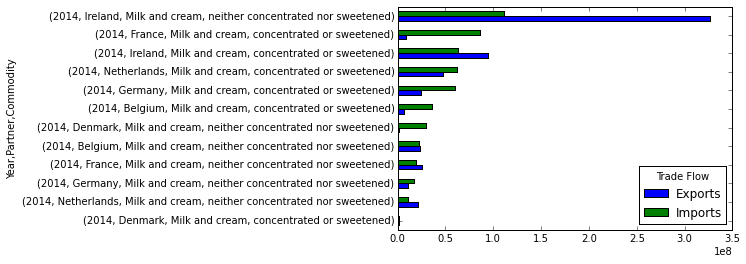

In [317]:
report.sort('Imports').plot(kind='barh')

_okay, this is how we generate the graphs I was trying to put together yesterday_

Here, the `.plot()` command produces a *grouped bar chart* with the bars grouped according to the order of the row index values. The values contained within any numerical columns are then displayed as bars.

In [318]:
#For convenience, let's assign the output of this pivot table operation to a variable...
report=pivot_table(milk_keypartners,
               index=['Year','Partner','Commodity'],
               columns='Trade Flow',
               values='Trade Value (US$)',
               margins=True, 
               aggfunc=sum)

#And then display the result, sorted by import value
report.sort('Imports',ascending=False)

Trade Flow                                                             Exports  \
Year Partner     Commodity                                                       
All                                                                  592848602   
2014 Ireland     Milk and cream, neither concentrated nor sweetened  326338567   
     France      Milk and cream, concentrated or sweetened             9025441   
     Ireland     Milk and cream, concentrated or sweetened            94889874   
     Netherlands Milk and cream, concentrated or sweetened            47518672   
     Germany     Milk and cream, concentrated or sweetened            24785683   
     Belgium     Milk and cream, concentrated or sweetened             6301229   
     Denmark     Milk and cream, neither concentrated nor sweetened    1059287   
     Belgium     Milk and cream, neither concentrated nor sweetened   23041778   
     France      Milk and cream, neither concentrated nor sweetened   25597541   
     Germany     Milk and cream, neither concentrated nor sweetened   11310950   
     Netherlands Milk and cream, neither concentrated nor sweetened   21130410   
     Denmark     Milk and cream, concentrated or sweetened             1849170   

Trade Flow                                                             Imports  \
Year Partner     Commodity                                                       
All                                                                  517019384   
2014 Ireland     Milk and cream, neither concentrated nor sweetened  111379639   
     France      Milk and cream, concentrated or sweetened            85631781   
     Ireland     Milk and cream, concentrated or sweetened            62936247   
     Netherlands Milk and cream, concentrated or sweetened            61531712   
     Germany     Milk and cream, concentrated or sweetened            59776965   
     Belgium     Milk and cream, concentrated or sweetened            36155409   
     Denmark     Milk and cream, neither concentrated nor sweetened   29432607   
     Belgium     Milk and cream, neither concentrated nor sweetened   22183336   
     France      Milk and cream, neither concentrated nor sweetened   19376395   
     Germany     Milk and cream, neither concentrated nor sweetened   16835735   
     Netherlands Milk and cream, neither concentrated nor sweetened   10677523   
     Denmark     Milk and cream, concentrated or sweetened             1102035   

Trade Flow                                                                  All  
Year Partner     Commodity                                                       
All                                                                  1109867986  
2014 Ireland     Milk and cream, neither concentrated nor sweetened   437718206  
     France      Milk and cream, concentrated or sweetened             94657222  
     Ireland     Milk and cream, concentrated or sweetened            157826121  
     Netherlands Milk and cream, concentrated or sweetened            109050384  
     Germany     Milk and cream, concentrated or sweetened             84562648  
     Belgium     Milk and cream, concentrated or sweetened             42456638  
     Denmark     Milk and cream, neither concentrated nor sweetened    30491894  
     Belgium     Milk and cream, neither concentrated nor sweetened    45225114  
     France      Milk and cream, neither concentrated nor sweetened    44973936  
     Germany     Milk and cream, neither concentrated nor sweetened    28146685  
     Netherlands Milk and cream, neither concentrated nor sweetened    31807933  
     Denmark     Milk and cream, concentrated or sweetened              2951205

### Task

Using your own data set containing data for both imports and exports of a particular trade item, see if you can use a pandas pivot table to answer the same questions you asked of your dataset in Exercise 5, as well as asking some new ones.

For example, try to use a pivot table to identify partner countries engaging in 'bi-derectional' trade who have total import values and export values greater than a certain threshold every month.

You can also use a pivot table in combination with other operations. For example, try using one of the filtered datasets you created using the `filter()` function, such as one that limited rows to partners trading above a certain level, as the basis for a pivot table report.

> Using your own data set containing data for both imports and exports of a particular trade item, see if you can use a pandas pivot table to answer the same questions you asked of your dataset in Exercise 5, as well as asking some new ones.

In [323]:
palmOilCountries

pivot_table(palmOilCountries, index = ["Year", "Partner", "Commodity"], aggfunc='sum', values=TV).head(4)

Year  Partner    Commodity                                          
2014  Argentina  Palm oil and its fractions, not chemically modified      3786
      Australia  Palm oil and its fractions, not chemically modified    104360
      Austria    Palm oil and its fractions, not chemically modified    102555
      Belgium    Palm oil and its fractions, not chemically modified    218711
Name: Trade Value (US$), dtype: int64

We don't gain much by adding in the commodity. So lets' lose it and instead have trade flow in the columns.

In [336]:
top_global_palm_oil = pivot_table(palmOilCountries, index = ["Year", "Partner"], aggfunc='sum', columns="Trade Flow", values=TV)

top_global_palm_oil.sort("Exports", ascending=False).head(5)

Trade Flow         Exports   Imports  Re-imports
Year Partner                                    
2014 Ireland      24314429       NaN         NaN
     Germany       3882286   5665940         NaN
     France        1419714    115921         NaN
     Netherlands   1243561  65547361         NaN
     Spain          928605   5670199         NaN

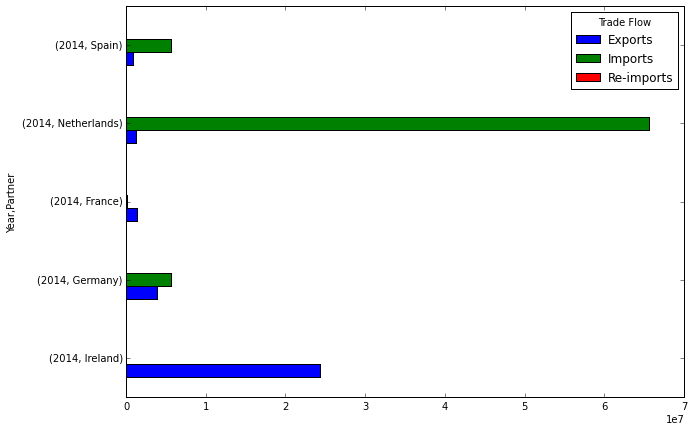

In [337]:
top_global_palm_oil.sort("Exports", ascending=False).head(5).plot(kind='barh', figsize=(10, 7))

> For example, try to use a pivot table to identify partner countries engaging in 'bi-derectional' trade who have total import values and export values greater than a certain threshold every month.

We do this by:

- taking the country data
- remove ones with NaN data in the import or export
- return only countries with data in imports _and_ exports
- filter again to check the data is sufficiently high each month
- pivot, then show on a map

In [349]:
len(palmOilCountries)

top_global_palm_oil_no_na= pivot_table(palmOilCountriesNoNa, index = ["Year", "Partner"], aggfunc='sum', columns="Trade Flow", values=TV)
top_global_palm_oil_no_na.head(5)

Trade Flow      Exports  Imports  Re-imports
Year Partner                                
2014 Argentina     3786      NaN         NaN
     Australia   104360      NaN         NaN
     Austria     102555      NaN         NaN
     Belgium     191289    27422         NaN
     Brazil       83672  1666775         NaN

Okay, that  didn't fix it for us.

Let's try this again.

In [354]:
palmOilCountriesNoNa[palmOilCountriesNoNa["Partner"] == "Argentina"]

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
191,2014,201406,Exports,United Kingdom,Argentina,"Palm oil and its fractions, not chemically mod...",1511,3786


In [352]:
palmOilCountries[palmOilCountries["Partner"] == "Argentina"]

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
191,2014,201406,Exports,United Kingdom,Argentina,"Palm oil and its fractions, not chemically mod...",1511,3786


#### So, we get the NaN when we have a value that doesn't exist.

We can test this by removing the `columns` attribute, so see if Agentina has any imports:

In [359]:
pivot_table(palmOilCountriesNoNa, index = ["Year", "Partner", "Trade Flow"], aggfunc='sum', values=TV).head()

Year  Partner    Trade Flow
2014  Argentina  Exports         3786
      Australia  Exports       104360
      Austria    Exports       102555
      Belgium    Exports       191289
                 Imports        27422
Name: Trade Value (US$), dtype: int64

Yup. So now we have to see if a dataframes groupby filters are smart enough to know about missing keys, or if we need to add them ourselves.

In [417]:
def bidirectional_trade(g):
    # bidrectional is greater than zero and the count is greater than one
    return g["Trade Flow"].all() in ["Imports", "Exports"]

bid = palmOilCountries.groupby(["Year", "Partner", "Trade Flow"]).filter(bidirectional_trade)
pivot_table(bid, index = ["Year", "Partner", "Trade Flow"], aggfunc='sum', values=TV).head()

Year  Partner    Trade Flow
2014  Argentina  Exports         3786
      Australia  Exports       104360
      Austria    Exports       102555
      Belgium    Exports       191289
                 Imports        27422
Name: Trade Value (US$), dtype: int64

Nope, that's not what I need. We want both Import AND Exports in there.

In [459]:
def bidirectional_trade(g):
    # bidrectional is greater than zero and the count is greater than one
    return g["Trade Flow"].all() in ["Imports", "Exports"]

bid = palmOilCountries.groupby(["Year", "Partner", "Trade Flow"]).filter(bidirectional_trade)

# this is a very unsatisfying way to do this
two_way_trade = bid.groupby(["Year", "Partner", "Period"]).filter(lambda g: len(g) == 2)
two_way_trade.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
5,2014,201401,Imports,United Kingdom,Brazil,"Palm oil and its fractions, not chemically mod...",1511,1663182
6,2014,201401,Exports,United Kingdom,Brazil,"Palm oil and its fractions, not chemically mod...",1511,20261
11,2014,201401,Imports,United Kingdom,France,"Palm oil and its fractions, not chemically mod...",1511,43918
12,2014,201401,Exports,United Kingdom,France,"Palm oil and its fractions, not chemically mod...",1511,142931
13,2014,201401,Imports,United Kingdom,Germany,"Palm oil and its fractions, not chemically mod...",1511,301684


So at last, we have a way to show countries with bidirectional trade. We can try pivoting again now.

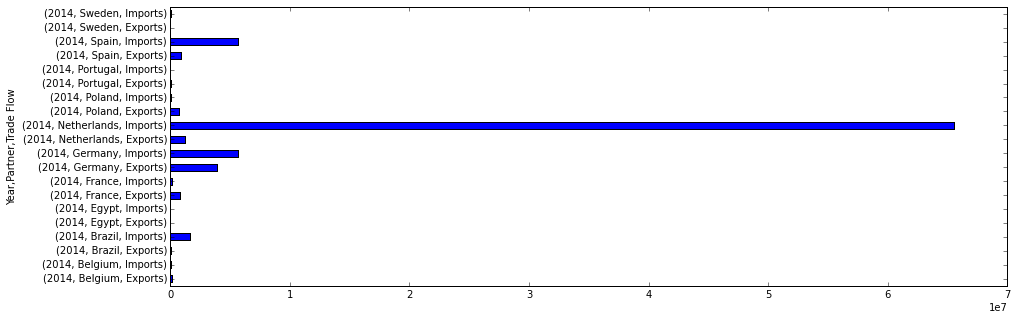

In [465]:
two_way_trade_table = pivot_table(two_way_trade, index = ["Year", "Partner", "Trade Flow"], aggfunc='sum', values=TV)


two_way_trade_table.plot(kind='barh', figsize=(15,5))

This us okay, but you can't really see the differences. Lets try using a log scale

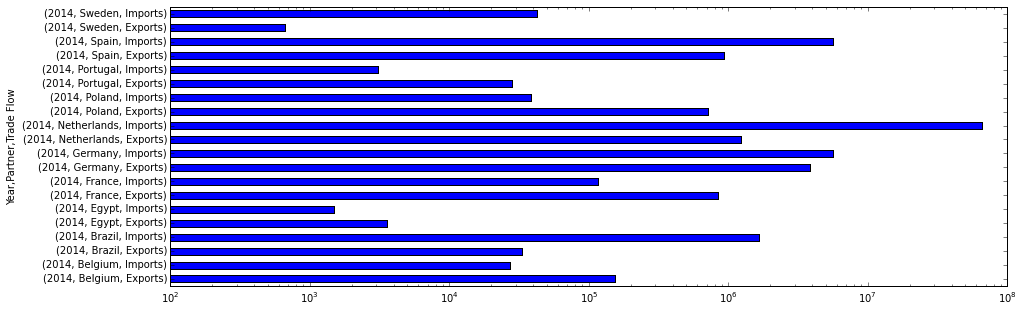

In [466]:
two_way_trade_table.plot(kind='barh', figsize=(15,5), logx=True)

Hmm… you can at least see now but it feels a bit deceptive.

In [ ]:
Lets 


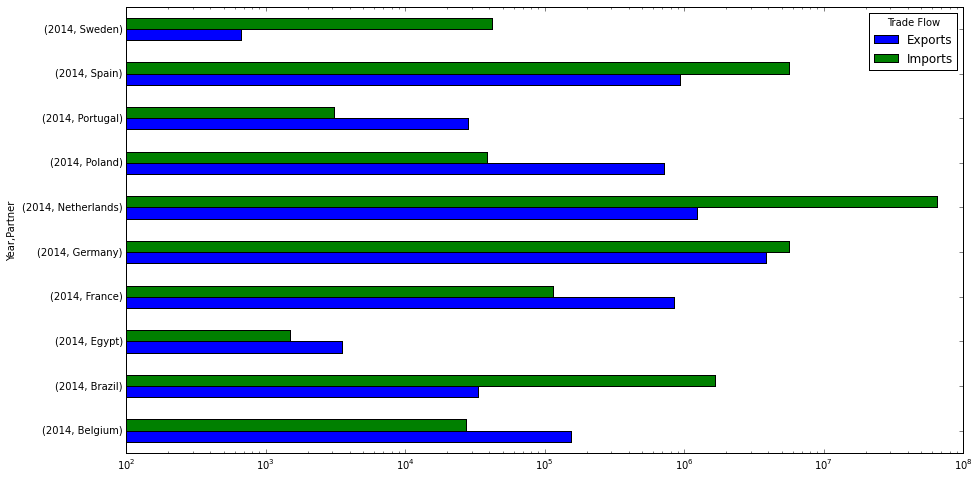

In [471]:
two_way_trade_table = pivot_table(two_way_trade, index = ["Year", "Partner"], columns="Trade Flow", aggfunc='sum', values=TV).plot(kind='barh', figsize=(15,8), logx=True)


**Now go back to the Exercise 6 step in FutureLearn to discuss and mark it complete.**